# Minju Yu

## Research question/interests

My research question asks: Is there a relationship between personality traits and race?

Previous research shows the relationship between personality traits among various cultures and ethnicity. Cultures and ethnicity influence socialization patterns, which shape some of the variances of personality (Triandis & Suh, 2002). However, limited research investigates the relationship between personality traits and race. Therefore, I would like to investigate the relationship between personality traits and race. I hypothesized that a particular race group would show higher scores on the big five personality traits (extraversion, neuroticism, agreeableness, conscientiousness, openness) than other race groups.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_csv("../data/raw/data.csv", sep='\t')
df_raw

## Task 1: EDA
Looking at the shape and general trends in the data:

In [ ]:
df_raw.shape

In [ ]:
df_raw.head()

In [ ]:
df_raw.columns

In [ ]:
df_raw.describe()

In [ ]:
df_raw.nunique()

The following columns are not useful to me and I will remove these in Task 2: age, engnat, gender, hand, source, country.
Examining the race column further:

In [ ]:
df_raw.race.unique()

There are 14 race values; I will rename them using the codebook and categorize/ remove them if needed in Task 2.
Examining personality traits columns further:

In [ ]:
df_raw.filter(regex='E').describe()

There are 10 extraversion items; I will calculate a total score and create a column for extraversion in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='N').describe()

There are 10 neuroticism items; I will calculate a total score and create a column for neuroticism in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='A').describe()

There are 10 agreeableness items; I will calculate a total score and create a column for agreeableness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='C').describe()

There are 10 conscientiousness items; I will calculate a total score and create a column for conscientiousness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='O').describe()

There are 10 openness items; I will calculate a total score and create a column for openness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

I am interested in the relationship between race and personality traits, so I will do a few plots to get a visual idea of the trends:

In [ ]:
df_raw.hist(column= "E1", by = "race")

This plot shows the distribution of one item of extraversion for all races. Some races seem to have a similar trend of increasing and then decreasing extraversion scores; however, it is hard to distinguish the difference. I will not be likely to use this plot to analyze the data.

In [ ]:
df_raw_eda = df_raw[['race','E1','N2','A2','C1','O1']].copy()
bargraph_eda = df_raw_eda.groupby('race').mean().plot.bar()
plt.legend(bbox_to_anchor=(1.0,1.0))

This plot shows the mean average for one item of each personality trait, separated by race. All races seem to have the highest score on agreeableness and the lowest score on extraversion.

In [ ]:
sns.lmplot(df_raw, x='E1', y='N2', hue='race', scatter=False)

This plot shows the relationship between one item of neuroticism and extraversion for all races. Most races seem to have a weak positive relationship between neuroticism and extraversion.

In [ ]:
sns.lmplot(df_raw, x='E1', y='A2', hue='race', scatter=False)

# This plot shows the relationship between one item of agreeableness and extraversion for all races.
# Most races seem to have a weak positive relationship between agreeableness and extraversion.

In [ ]:
sns.lmplot(df_raw, x='E1', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and extraversion for all races.
# The relationship between conscientiousness and extraversion varies among races; it would be interesting to take a closer look at this relationship.

In [ ]:
sns.lmplot(df_raw, x='E1', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and extraversion for all races.
# Most races seem to have no relationship between openness and extraversion.

In [ ]:
sns.lmplot(df_raw, x='N2', y='A2', hue='race', scatter=False)

# This plot shows the relationship between one item of agreeableness and neuroticism for all races.
# All races seem to have a weak positive relationship between agreeableness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='N2', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and neuroticism for all races.
# All races seem to have a weak positive relationship between conscientiousness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='N2', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and neuroticism for all races.
# Most races seem to have no relationship between openness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='A2', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and agreeableness for all races.
# Most races seem to have a weak positive relationship between conscientiousness and agreeableness.

In [ ]:
sns.lmplot(df_raw, x='A2', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and agreeableness for all races.
# Most races seem to have no relationship between openness and agreeableness.

In [ ]:
sns.lmplot(df_raw, x='C1', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and conscientiousness for all races.
# Most races seem to have a weak positive relationship between openness and conscientiousness.

I now have a good idea of the trends in the data relevant to my research question. There seems to be no significant relationship between personality traits and race.

## Task 2: Data Analysis Pipeline

#### 1. Load Data (already done)
#### 2. Clean Data

Remove columns that are not relevant to my research question: age, engnat, gender, hand, source, country.

In [ ]:
df_new = df_raw.copy().drop(['age', 'engnat', 'gender', 'hand', 'source', 'country'], axis=1)

Check for missing data: None and NaN values.

In [ ]:
pd.isnull(df_new).values.any()

In [ ]:
np.isnan(df_new).values.any()

There are neither None nor NaN values. Good!

#### 3. Process Data
According to the codebook, items were rated on a five-point scale where 1=Disagree, 3=Neutral, 5=Agree (0=missed). <br>
Reverse score certain items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6.

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

def reverseScoring(df, high, cols):
    '''
    Reverse scores on given column(s).
    
    Arguments:
    df - the data frame
    high - (int) the highest score available
    cols - the column(s) to reverse
    '''
    df[cols] = high - df[cols]
    return df

In [ ]:
df_new = reverseScoring(df_new, 6, cols=['E2','E4','E6','E8','E10','N1','N3','N5','N6','N7','N8','N9','N10','A1','A3','A5','A7','C2','C4','C6','C8','O2','O4','O6'])

Create factor total scores for big five personality traits: extroversion, neuroticism, agreeableness, conscientiousness, openness.

In [ ]:
df_new['E_Total'] = df_new.loc[:, 'E1':'E10'].sum(axis=1)
df_new['N_Total'] = df_new.loc[:, 'N1':'N10'].sum(axis=1)
df_new['A_Total'] = df_new.loc[:, 'A1':'A10'].sum(axis=1)
df_new['C_Total'] = df_new.loc[:, 'C1':'C10'].sum(axis=1)
df_new['O_Total'] = df_new.loc[:, 'O1':'O10'].sum(axis=1)

This data contains 14 race values. According to the codebook, each code refers to:

0 = Missing <br>
1 = Mixed Race <br>
2 = Arctic (Siberian, Eskimo) <br>
3 = Caucasian (European) <br>
4 = Caucasian (Indian) <br>
5 = Caucasian (Middle East) <br>
6 = Caucasian (North African, Other) <br>
7 = Indigenous Australian <br>
8 = Native American <br>
9 = North East Asian (Mongol, Tibetan, Korean, Japanese, etc.) <br>
10 = Pacific (Polynesian, Micronesian, etc.) <br>
11 = South East Asian (Chinese, Thai, Malay, Filipino, etc.) <br>
12 = West African, Bushmen <br>
13 = Other

Remove 0, 1 and 13 and categorize into 5 groups.

0. American Indian or Alaska Native: 2,8
1. Asian: 9,11
2. Black or African American: 7,12
3. Native Hawaiian or Other Pacific Islander: 10
4. White: 3,4,5,6

In [ ]:
df_new = df_new[df_new['race'] != 0]
df_new = df_new[df_new['race'] != 1]
df_new = df_new[df_new['race'] != 13]

In [ ]:
df_new = df_new.replace({'race':2},100)
df_new = df_new.replace({'race':8},100)
df_new = df_new.replace({'race':9},101)
df_new = df_new.replace({'race':11},101)
df_new = df_new.replace({'race':7},102)
df_new = df_new.replace({'race':12},102)
df_new = df_new.replace({'race':10},103)
df_new = df_new.replace({'race':3},104)
df_new = df_new.replace({'race':4},104)
df_new = df_new.replace({'race':5},104)
df_new = df_new.replace({'race':6},104)

In [ ]:
df_new = df_new.replace({'race':100},0)
df_new = df_new.replace({'race':101},1)
df_new = df_new.replace({'race':102},2)
df_new = df_new.replace({'race':103},3)
df_new = df_new.replace({'race':104},4)

In [ ]:
df_new

#### 4. Wrangle Data
Create a data frame that only contains relevant to my research question:
- Categorized race: American Indian or Alaska Native, Asian, Black or African American, Native Hawaiian or Other Pacific Islander, White.
- Factor total scores for the big five personality traits: Extroversion, Neuroticism, Agreeableness, Conscientiousness, Openness.

In [ ]:
df_cleaned = df_new[['race', 'E_Total', 'N_Total', 'A_Total', 'C_Total', 'O_Total']]

Rename columns for the big five personality traits and race.

In [ ]:
df_cleaned = df_cleaned.rename(columns={'E_Total':'Extraversion',
                                       'N_Total':'Neuroticism',
                                       'A_Total':'Agreeableness',
                                       'C_Total':'Conscientiousness',
                                       'O_Total':'Openness',
                                       'race':'Race'})

In [ ]:
df_cleaned = df_cleaned.replace({'Race':0}, 'American Indian or Alaska Native')
df_cleaned = df_cleaned.replace({'Race':1}, 'Asian')
df_cleaned = df_cleaned.replace({'Race':2}, 'Black or African American')
df_cleaned = df_cleaned.replace({'Race':3}, 'Native Hawaiian or Other Pacific Islander')
df_cleaned = df_cleaned.replace({'Race':4}, 'White')

In [ ]:
df_cleaned

#### 5. EDA (Visualization)
Bar plot showing the comparison of mean factor scores of the big five personality traits, by race:

In [ ]:
mean_bargraph = df_cleaned.groupby('Race').mean().plot.bar(grid=True, width=.5, alpha=.90)
mean_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')

Bar plot showing the comparison of median factor scores of the big five personality traits, by race:

In [ ]:
median_bargraph = df_cleaned.groupby('Race').median().plot.bar(grid=True, width=.5, alpha=.90)
median_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')

Correlation matrix of the big five personality traits for American Indian or Alaska Native:

In [ ]:
df_cleaned_american = df_cleaned[df_cleaned['Race'] == 'American Indian or Alaska Native']
df_corr_american = df_cleaned_american.corr()
ax = plt.axes()
sns.heatmap(df_corr_american, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('American Indian or Alaska Native')

Correlation matrix of the big five personality traits for Asian:

In [ ]:
df_cleaned_asian = df_cleaned[df_cleaned['Race'] == 'Asian']
df_corr_asian = df_cleaned_asian.corr()
ax = plt.axes()
sns.heatmap(df_corr_asian, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Asian')

Correlation matrix of the big five personality traits for Black or African American:

In [ ]:
df_cleaned_black = df_cleaned[df_cleaned['Race'] == 'Black or African American']
df_corr_black = df_cleaned_black.corr()
ax = plt.axes()
sns.heatmap(df_corr_black, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Black or African American')

Correlation matrix of the big five personality traits for Native Hawaiian or Other Pacific Islander:

In [ ]:
df_cleaned_native = df_cleaned[df_cleaned['Race'] == 'Native Hawaiian or Other Pacific Islander']
df_corr_native = df_cleaned_native.corr()
ax = plt.axes()
sns.heatmap(df_corr_native, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Native Hawaiian or Other Pacific Islander')

Correlation matrix of the big five personality traits for White:

In [ ]:
df_cleaned_white = df_cleaned[df_cleaned['Race'] == 'White']
df_corr_white = df_cleaned_white.corr()
ax = plt.axes()
sns.heatmap(df_corr_white, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('White')

Line plot showing the relationship between Extraversion and Neuroticism, by race:

In [ ]:
sns.lmplot(df_cleaned, x='Extraversion', y='Neuroticism', hue='Race',  scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Agreeableness, by race:

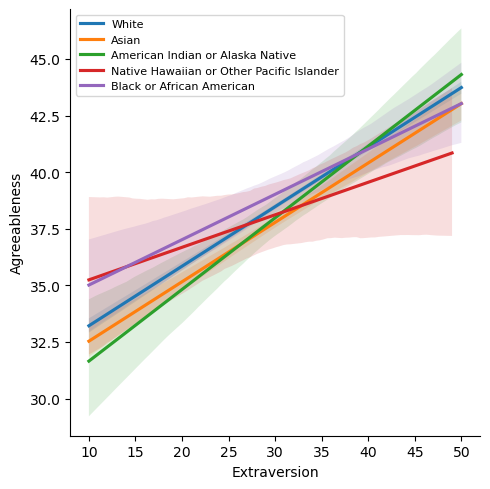

In [56]:
sns.lmplot(df_cleaned, x='Extraversion', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Conscientiousness, by race:

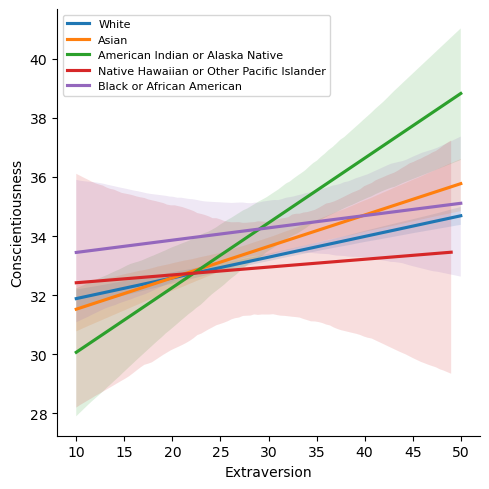

In [57]:
sns.lmplot(df_cleaned, x='Extraversion', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Openness, by race:

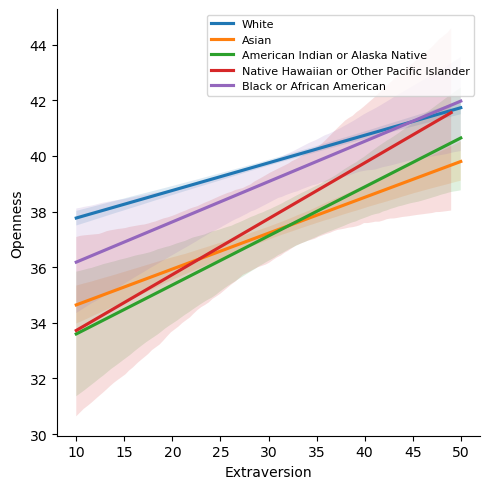

In [58]:
sns.lmplot(df_cleaned, x='Extraversion', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Agreeableness, by race:

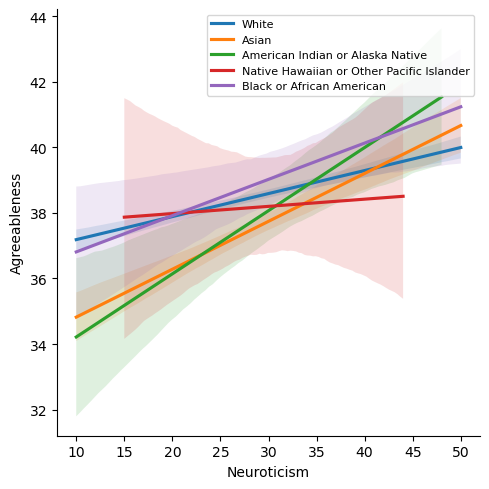

In [59]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Conscientiousness, by race:

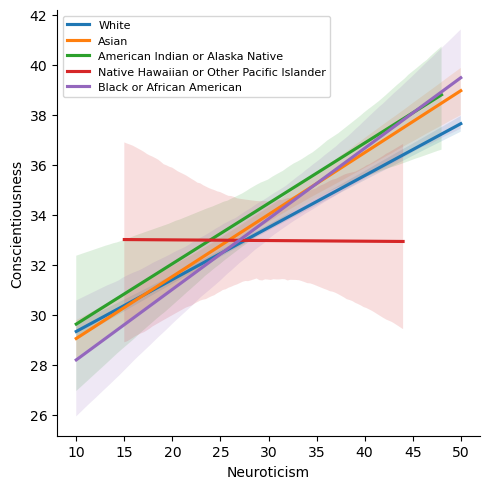

In [60]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Openness, by race:

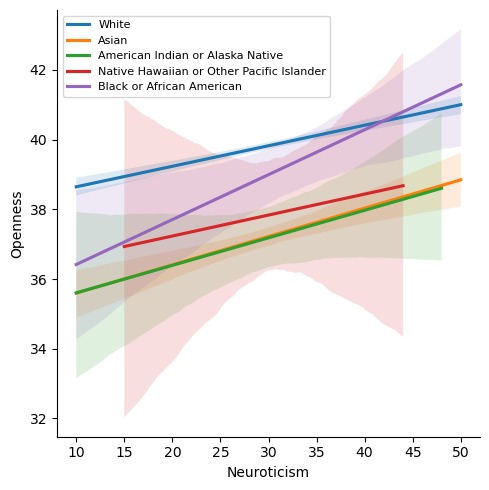

In [61]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Agreeableness and Conscientiousness, by race:

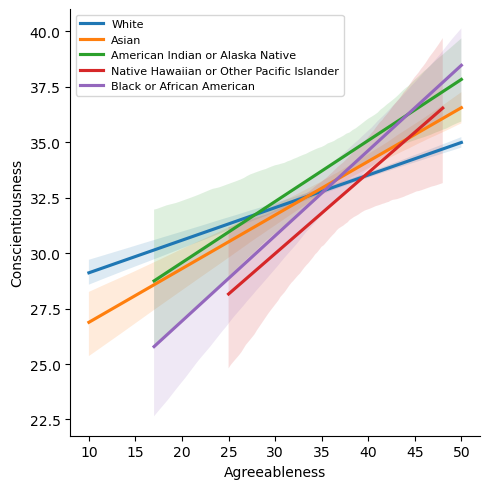

In [62]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Agreeableness and Openness, by race:

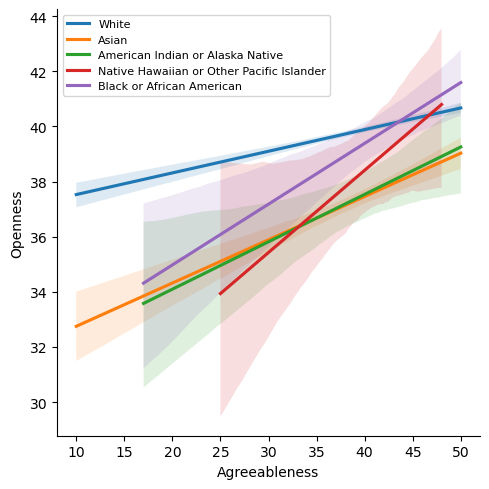

In [63]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Conscientiousness and Openness, by race:

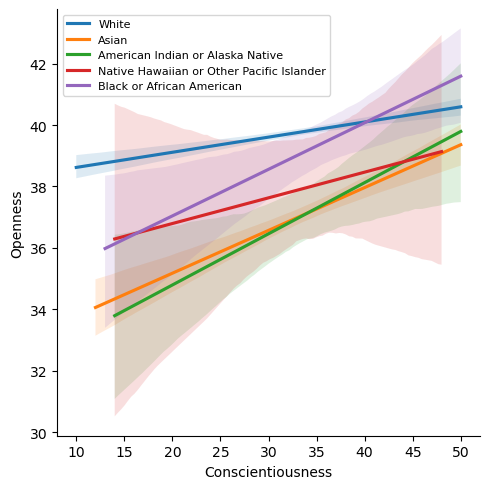

In [64]:
sns.lmplot(df_cleaned, x='Conscientiousness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

## Task 3: Method Chaining and writing Python programs
Step 1: Build and test the method chain(s). <br>
Transfer the steps to load, clean, process, and wrangle the data in Task 2 into a .py file.
#### Load package(s) and function(s):

In [ ]:
import pandas as pd
import project_functions3 as pf3

#### Method Chain 1:
Method chain to load a .csv file and drop unwanted columns.

In [ ]:
df_1 = (pd.read_csv("../data/raw/data.csv", sep='\t')
        .copy().drop(['age', 'engnat', 'gender', 'hand', 'source', 'country'], axis=1))
df_1

#### Method Chain 2:
Method chain to reverse score items that are reverse-coded and assign new columns containing factor total scores by summing scores on the constituent items for each factor.

In [ ]:
def reverseScoring(df, high, cols):
    '''
    Reverse scores on given column(s).
    
    Arguments:
    df - the data frame
    high - (int) the highest score available
    cols - the column(s) to reverse
    '''
    df[cols] = high - df[cols]
    return df

df_1 = reverseScoring(df_1, 6, cols=['E2','E4','E6','E8','E10','N1','N3','N5','N6','N7','N8','N9','N10','A1','A3','A5','A7','C2','C4','C6','C8','O2','O4','O6'])

df_2 = (pd.DataFrame(df_1)
        .assign(E_Total=lambda x: df_1.loc[:, 'E1':'E10'].sum(axis=1))
        .assign(N_Total=lambda x: df_1.loc[:, 'N1':'N10'].sum(axis=1))
        .assign(A_Total=lambda x: df_1.loc[:, 'A1':'A10'].sum(axis=1))
        .assign(C_Total=lambda x: df_1.loc[:, 'C1':'C10'].sum(axis=1))
        .assign(O_Total=lambda x: df_1.loc[:, 'O1':'O10'].sum(axis=1)))

df_2

Step 2: Wrap the method chain(s) in a function.

In [ ]:
import project_functions3 as pf3
df = pf3.load_and_process("../data/raw/data.csv")
df

Nice and clean!
## Task 4: Analysis for the Research Question(s)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import project_functions3 as pf3
df = pf3.load_and_process("../data/raw/data.csv")
df

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,3,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,13,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,1,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,3,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,11,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,3,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,5,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,12,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


In [67]:
df = df[df['race'] != 0]
df = df[df['race'] != 1]
df = df[df['race'] != 13]

df = df.replace({'race':2},'American Indian or Alaska Native')
df = df.replace({'race':8},'American Indian or Alaska Native')
df = df.replace({'race':9},'Asian')
df = df.replace({'race':11},'Asian')
df = df.replace({'race':7},'Black or African American')
df = df.replace({'race':12},'Black or African American')
df = df.replace({'race':10},'Native Hawaiian or Other Pacific Islander')
df = df.replace({'race':3},'White')
df = df.replace({'race':4},'White')
df = df.replace({'race':5},'White')
df = df.replace({'race':6},'White')

df_cleaned = df[['race', 'E_Total', 'N_Total', 'A_Total', 'C_Total', 'O_Total']]
df_cleaned = df_cleaned.rename(columns={'E_Total':'Extraversion',
                                       'N_Total':'Neuroticism',
                                       'A_Total':'Agreeableness',
                                       'C_Total':'Conscientiousness',
                                       'O_Total':'Openness',
                                       'race':'Race'})

df

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,White,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
3,White,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,Asian,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
6,White,5,5,5,5,5,5,5,2,4,...,5,4,3,3,4,46,39,45,28,41
7,White,4,3,5,3,5,5,4,3,4,...,5,5,3,2,5,39,45,41,44,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,Asian,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,White,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,White,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,Black or African American,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


#### My research question asks: Is there a relationship between personality traits and race?
Bar plot showing the comparison of mean factor scores of the big five personality traits, by race:

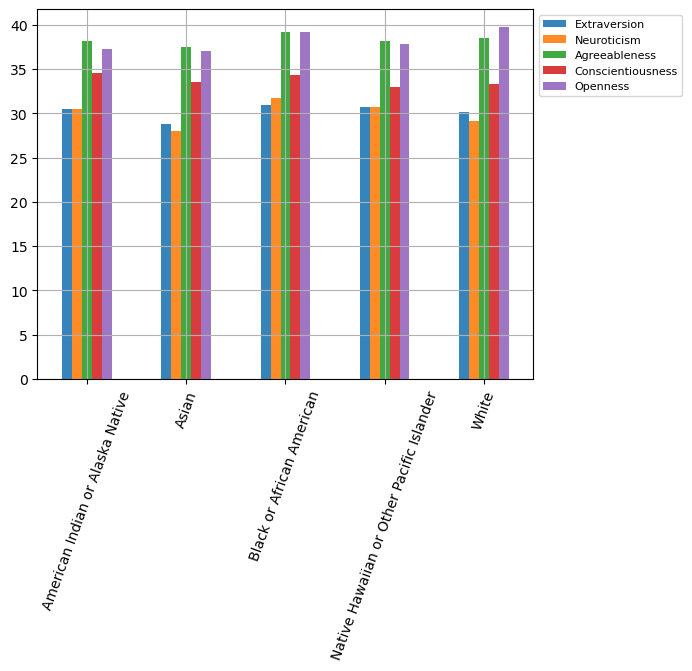

In [68]:
mean_bargraph = df_cleaned.groupby('Race').mean().plot.bar(grid=True, width=.5, alpha=.90)
mean_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')

Bar plot showing the comparison of median factor scores of the big five personality traits, by race:

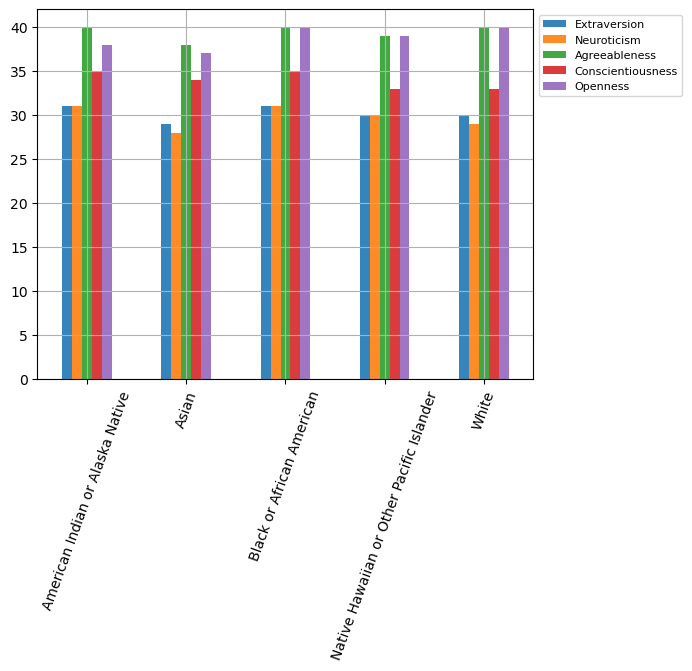

In [69]:
median_bargraph = df_cleaned.groupby('Race').median().plot.bar(grid=True, width=.5, alpha=.90)
median_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')

Correlation matrix of the big five personality traits for American Indian or Alaska Native:

Text(0.5, 1.0, 'American Indian or Alaska Native')

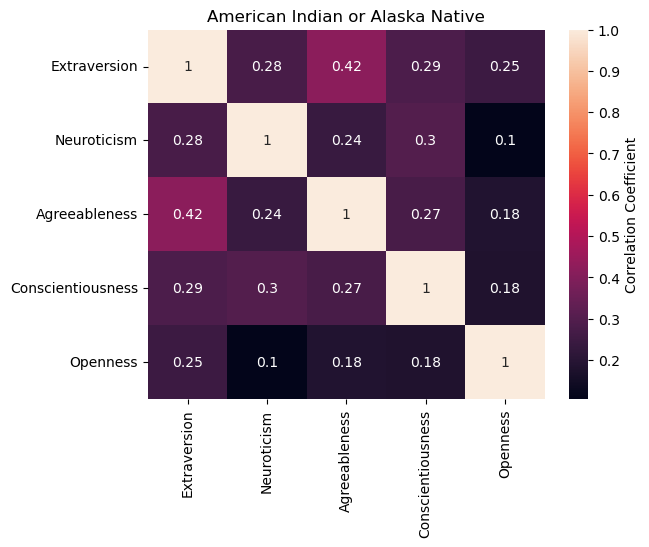

In [70]:
df_cleaned_american = df_cleaned[df_cleaned['Race'] == 'American Indian or Alaska Native']
df_corr_american = df_cleaned_american.corr()
ax = plt.axes()
sns.heatmap(df_corr_american, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('American Indian or Alaska Native')

Correlation matrix of the big five personality traits for Asian:

Text(0.5, 1.0, 'Asian')

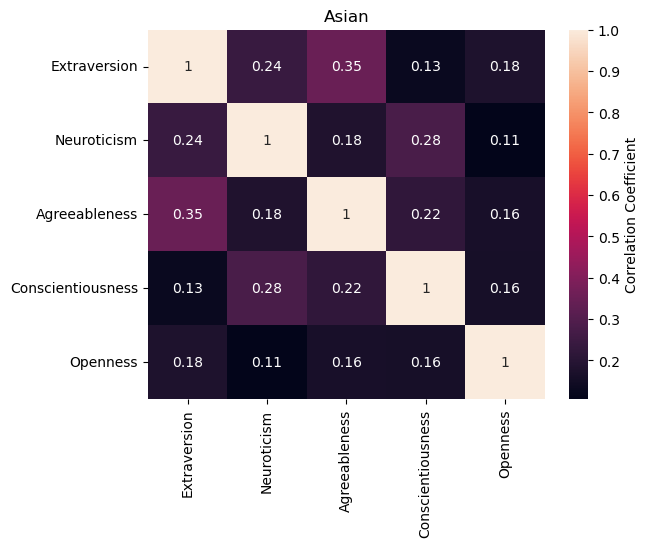

In [71]:
df_cleaned_asian = df_cleaned[df_cleaned['Race'] == 'Asian']
df_corr_asian = df_cleaned_asian.corr()
ax = plt.axes()
sns.heatmap(df_corr_asian, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Asian')

Correlation matrix of the big five personality traits for Black or African American:

Text(0.5, 1.0, 'Black or African American')

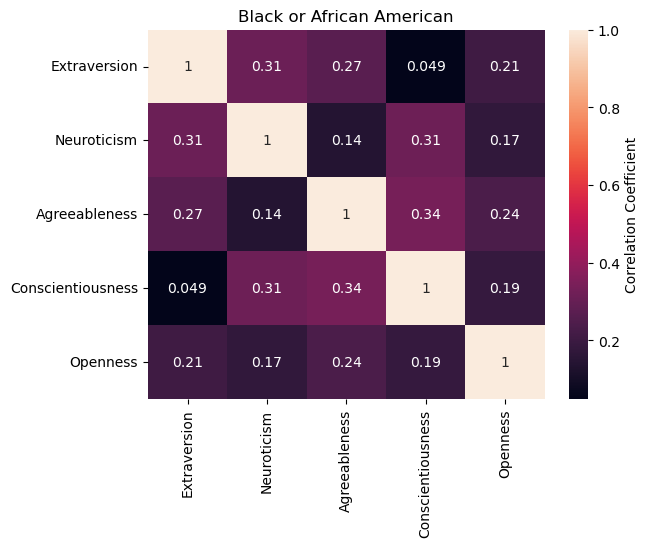

In [72]:
df_cleaned_black = df_cleaned[df_cleaned['Race'] == 'Black or African American']
df_corr_black = df_cleaned_black.corr()
ax = plt.axes()
sns.heatmap(df_corr_black, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Black or African American')

Correlation matrix of the big five personality traits for Native Hawaiian or Other Pacific Islander:

Text(0.5, 1.0, 'Native Hawaiian or Other Pacific Islander')

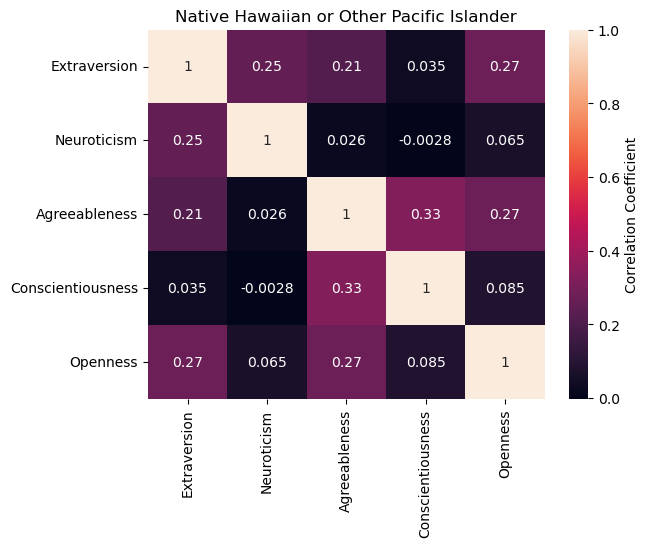

In [73]:
df_cleaned_native = df_cleaned[df_cleaned['Race'] == 'Native Hawaiian or Other Pacific Islander']
df_corr_native = df_cleaned_native.corr()
ax = plt.axes()
sns.heatmap(df_corr_native, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Native Hawaiian or Other Pacific Islander')

Correlation matrix of the big five personality traits for White:

Text(0.5, 1.0, 'White')

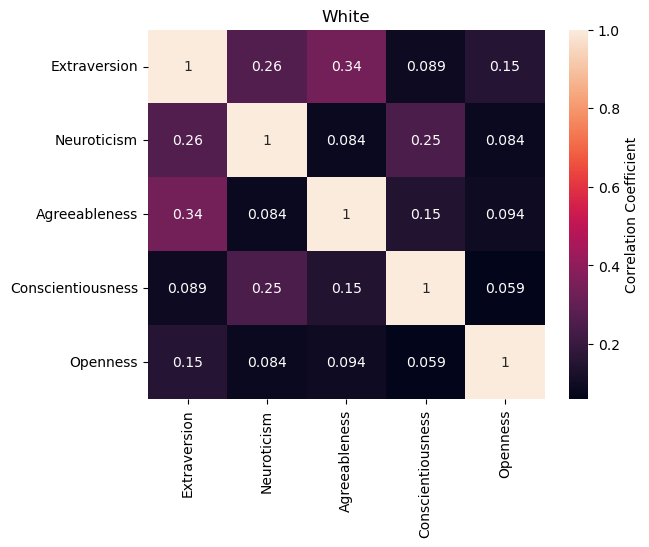

In [74]:
df_cleaned_white = df_cleaned[df_cleaned['Race'] == 'White']
df_corr_white = df_cleaned_white.corr()
ax = plt.axes()
sns.heatmap(df_corr_white, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('White')

Line plot showing the relationship between Extraversion and Neuroticism, by race:

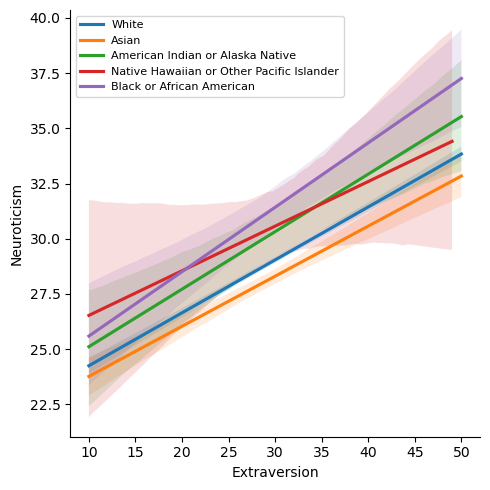

In [75]:
sns.lmplot(df_cleaned, x='Extraversion', y='Neuroticism', hue='Race',  scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Agreeableness, by race:

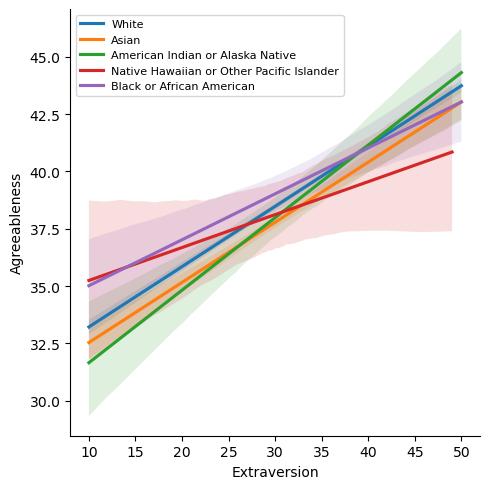

In [76]:
sns.lmplot(df_cleaned, x='Extraversion', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Conscientiousness, by race:

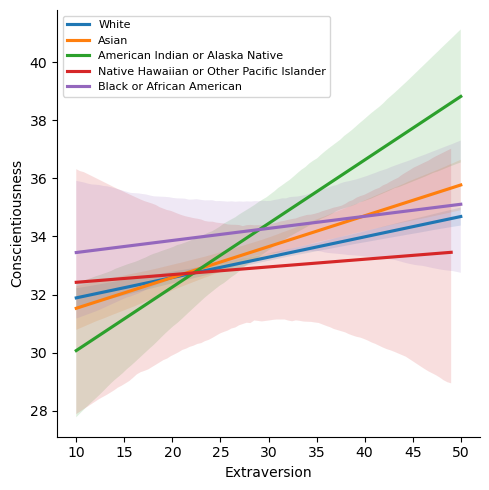

In [77]:
sns.lmplot(df_cleaned, x='Extraversion', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Extraversion and Openness, by race:

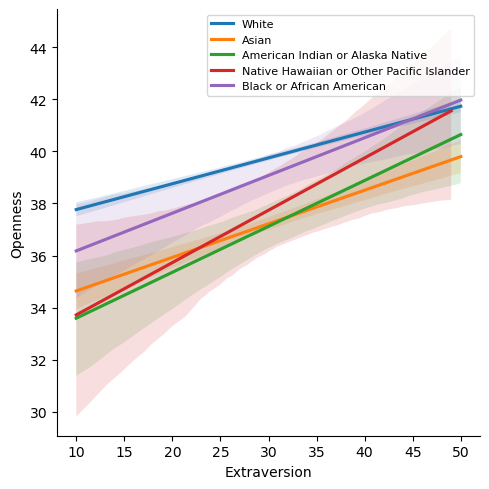

In [78]:
sns.lmplot(df_cleaned, x='Extraversion', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Agreeableness, by race:

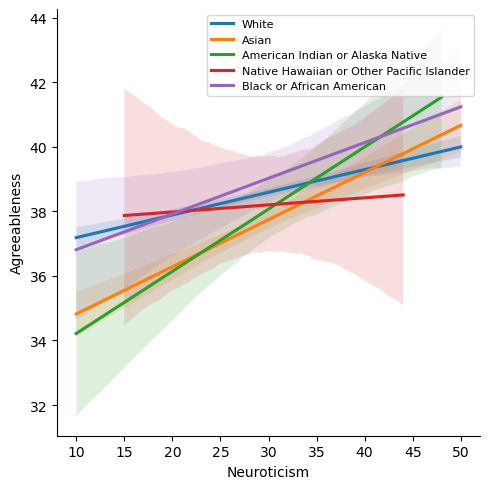

In [79]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Conscientiousness, by race:

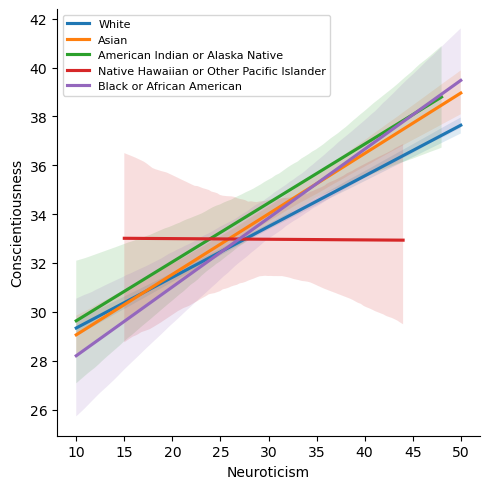

In [80]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Neuroticism and Openness, by race:

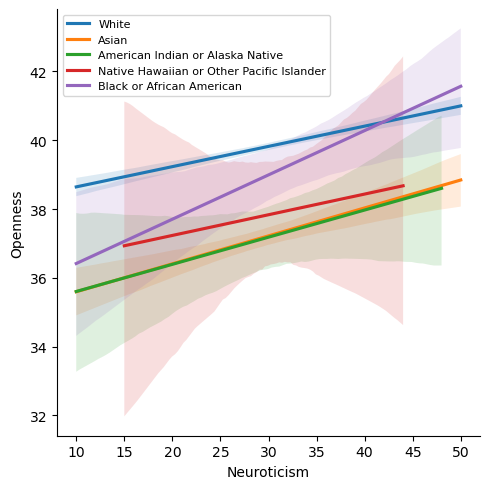

In [81]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Agreeableness and Conscientiousness, by race:

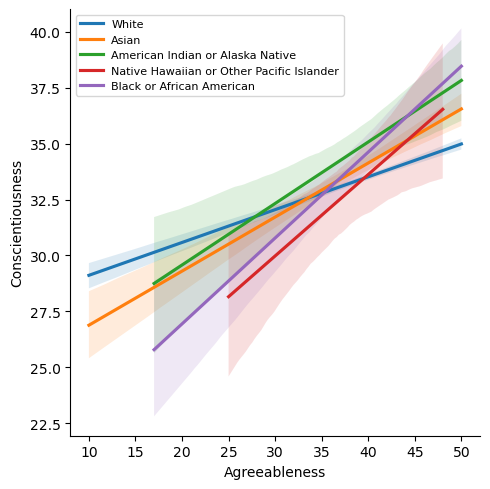

In [82]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Agreeableness and Openness, by race:

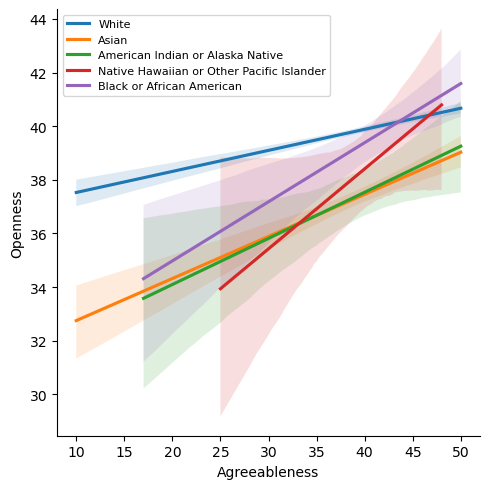

In [83]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

Line plot showing the relationship between Conscientiousness and Openness, by race:

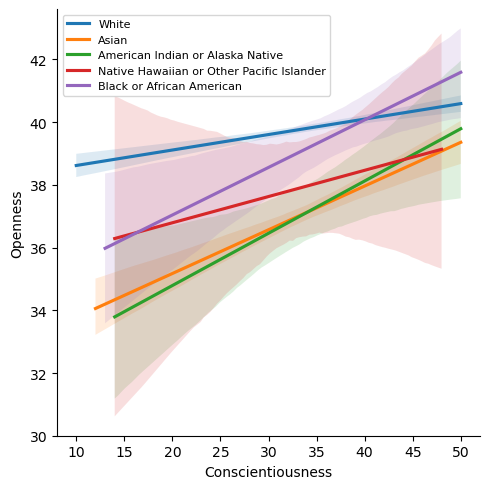

In [84]:
sns.lmplot(df_cleaned, x='Conscientiousness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')